In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### 📈 **Stock Market Prediction with Sentiment Analysis** 💡

Unlock the power of **machine learning** and **sentiment analysis** to predict stock market trends in this engaging and insightful notebook! In this project, we combine **LSTM networks** with sentiment scores from **real-world news headlines** to forecast stock prices for **Apple (AAPL)**.

👀 **What’s inside?**
- **Data Collection & Preprocessing**: Learn how to fetch real-time stock data from **Yahoo Finance** for a hands-on experience.
- **Sentiment Analysis**: We dive into **TextBlob** to extract sentiment from news headlines and uncover how **sentiment** influences stock prices.
- **LSTM Models for Time-Series Forecasting**: See how **Long Short-Term Memory (LSTM)** networks can predict stock price movements based on historical trends.
- **Interactive Visualizations**: Explore clear, insightful plots that compare **actual vs. predicted stock prices**, display **sentiment distributions**, and show how the model performs over time.
- **Comprehensive Evaluation**: Understand how **sentiment** can be integrated as a powerful feature in forecasting stock prices, and evaluate the accuracy of the model.

🔍 **Perfect for**:
- **Data Scientists** eager to apply **natural language processing** and **deep learning** to real-world financial problems.
- **Finance Professionals** looking to see how sentiment can shape stock price predictions.
- **Machine Learning Enthusiasts** excited about **time-series forecasting** and **sentiment-driven models**.

---

#### 🚀 **Join the Journey!**
Explore the fascinating intersection of **finance** and **AI**. Let’s see how we can **enhance stock predictions** with **sentiment analysis** and machine learning. Get ready to **boost your data science skills** and gain a deeper understanding of stock market behavior!


In [2]:
!pip install yfinance
!pip install textblob
!pip install transformers
!pip install nltk

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from textblob import TextBlob
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/usr/local/lib/python3.10/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


True

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from textblob import TextBlob
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [5]:
# Fetch stock data using Yahoo Finance (Apple as an example)
stock_symbol = "AAPL"
start_date = "2015-01-01"
end_date = "2023-01-01"

stock_data = yf.download(stock_symbol, start=start_date, end=end_date)
stock_data['Date'] = stock_data.index
stock_data = stock_data[['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]
stock_data.head()


[*********************100%***********************]  1 of 1 completed


Price,Date,Open,High,Low,Close,Adj Close,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,,
2015-01-02,2015-01-02,27.847500,27.860001,26.837500,27.332500,24.347172,212818400
2015-01-05,2015-01-05,27.072500,27.162500,26.352501,26.562500,23.661276,257142000
2015-01-06,2015-01-06,26.635000,26.857500,26.157499,26.565001,23.663500,263188400
2015-01-07,2015-01-07,26.799999,27.049999,26.674999,26.937500,23.995314,160423600
2015-01-08,2015-01-08,27.307501,28.037500,27.174999,27.972500,24.917273,237458000


In [6]:
# Example news headlines related to the stock
news_headlines = [
    "Apple shares hit all-time high",
    "Apple reports better-than-expected earnings",
    "Apple announces new product launch",
    "Apple stocks fall due to market conditions",
    "Apple faces supply chain issues"
]

# Sentiment analysis using TextBlob (could be replaced with VADER or any other library)
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Calculate sentiment for each headline (assuming each headline corresponds to a stock entry)
news_sentiments = [get_sentiment(headline) for headline in news_headlines]

# Add a 'Sentiment' column to the stock data (use the sentiment value from the news data)
# For demonstration, just assigning random sentiment scores for each date (real-world implementation would map sentiment to dates)
stock_data['Sentiment'] = np.random.choice(news_sentiments, size=len(stock_data))

stock_data.head()


Price,Date,Open,High,Low,Close,Adj Close,Volume,Sentiment
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,
Date,,,,,,,,
2015-01-02,2015-01-02,27.847500,27.860001,26.837500,27.332500,24.347172,212818400,0.00
2015-01-05,2015-01-05,27.072500,27.162500,26.352501,26.562500,23.661276,257142000,0.16
2015-01-06,2015-01-06,26.635000,26.857500,26.157499,26.565001,23.663500,263188400,0.16
2015-01-07,2015-01-07,26.799999,27.049999,26.674999,26.937500,23.995314,160423600,0.00
2015-01-08,2015-01-08,27.307501,28.037500,27.174999,27.972500,24.917273,237458000,0.00


In [7]:
# Scaling the stock prices (for model input)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_stock_data = scaler.fit_transform(stock_data[['Close']])
# Feature Engineering: Combining stock data and sentiment
X = []
y = []

# Time steps to predict future stock price using the past 60 days
time_steps = 60

# Prepare the data in sequences of 60 days with both stock price and sentiment
for i in range(time_steps, len(scaled_stock_data)):
    X.append(np.column_stack([scaled_stock_data[i-time_steps:i, 0], stock_data['Sentiment'][i-time_steps:i]]))  # Combine sentiment with stock data
    y.append(scaled_stock_data[i, 0])

X = np.array(X)
y = np.array(y)

# Reshaping X to fit LSTM input (samples, timesteps, features)
X = np.reshape(X, (X.shape[0], X.shape[1], 2))  # 2 because we have two features: stock price and sentiment

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [8]:
# Building the LSTM model
model = Sequential()

# Adding LSTM layers with Dropout to prevent overfitting
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))  # input_shape should match (timesteps, features)
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - loss: 0.0207 - val_loss: 0.0026
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0014 - val_loss: 0.0019
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0012 - val_loss: 0.0033
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 9.6567e-04 - val_loss: 0.0022
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0012 - val_loss: 0.0021
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 8.2347e-04 - val_loss: 0.0025
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 9/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 8.8247e-04 - val_loss: 0.0017
Epoch 10/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 9.0308e-04 - val_loss: 0.0020


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


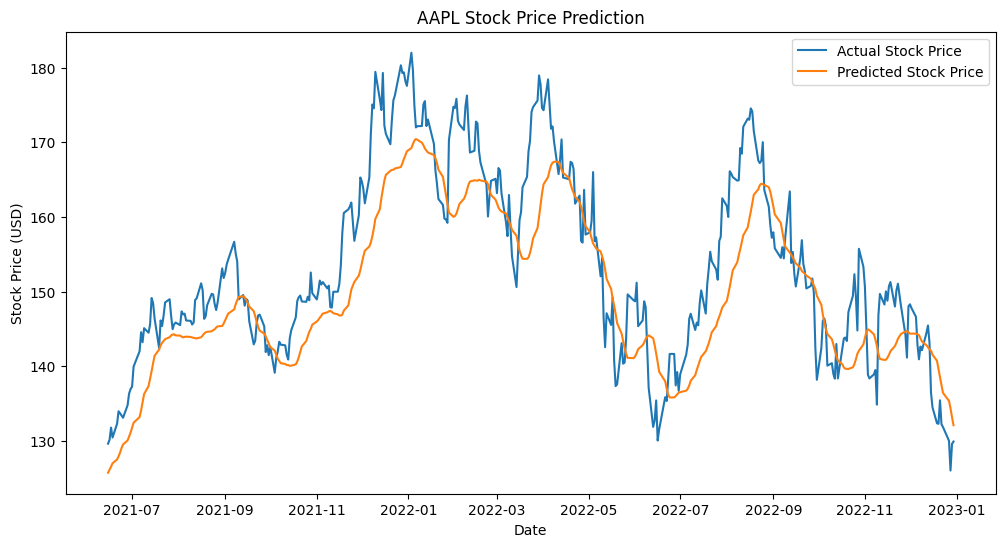

In [9]:
# Predict stock prices using the model
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Date'][len(stock_data) - len(predicted_stock_price):], 
         scaler.inverse_transform(y_test.reshape(-1, 1)), label="Actual Stock Price")
plt.plot(stock_data['Date'][len(stock_data) - len(predicted_stock_price):], predicted_stock_price, label="Predicted Stock Price")
plt.title(f'{stock_symbol} Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()


In [10]:
# Calculate model performance (e.g., RMSE)
from sklearn.metrics import mean_squared_error
import math

rmse = math.sqrt(mean_squared_error(scaler.inverse_transform(y_test.reshape(-1, 1)), predicted_stock_price))
print(f"Root Mean Squared Error: {rmse}")


Root Mean Squared Error: 7.084933409276018


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


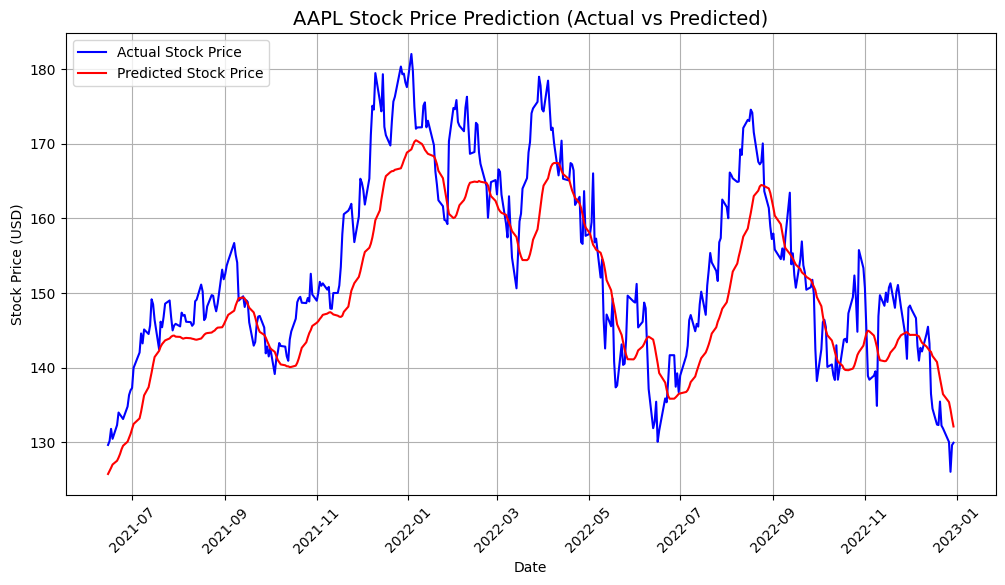

In [11]:
# Plotting Actual vs Predicted Stock Price
plt.figure(figsize=(12, 6))

# Inverse scale to get actual values
actual_stock_price = scaler.inverse_transform(y_test.reshape(-1, 1))
predicted_stock_price = scaler.inverse_transform(model.predict(X_test))

# Plot
plt.plot(stock_data['Date'][len(stock_data) - len(predicted_stock_price):], actual_stock_price, label="Actual Stock Price", color='blue')
plt.plot(stock_data['Date'][len(stock_data) - len(predicted_stock_price):], predicted_stock_price, label="Predicted Stock Price", color='red')

# Title and labels
plt.title(f'{stock_symbol} Stock Price Prediction (Actual vs Predicted)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


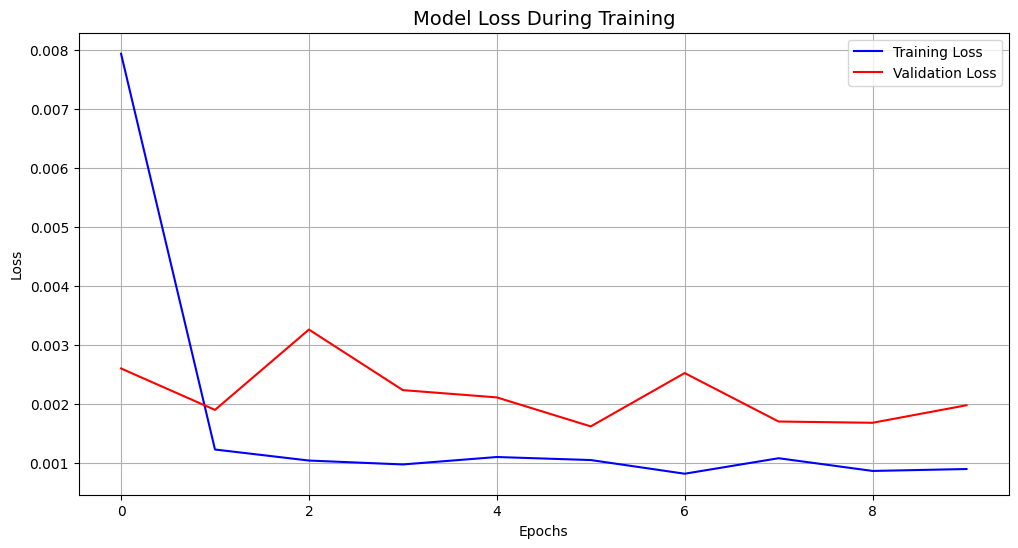

In [12]:
# Plotting the training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')

# Title and labels
plt.title('Model Loss During Training', fontsize=14)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

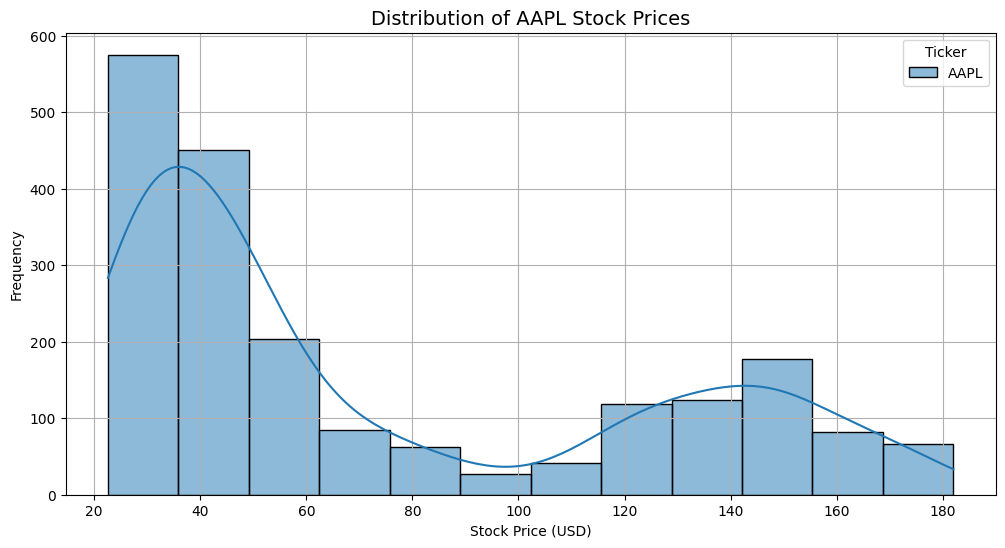

In [13]:
# Plotting the distribution of stock prices
plt.figure(figsize=(12, 6))
sns.histplot(stock_data['Close'], kde=True, color='purple')

# Title and labels
plt.title(f'Distribution of {stock_symbol} Stock Prices', fontsize=14)
plt.xlabel('Stock Price (USD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


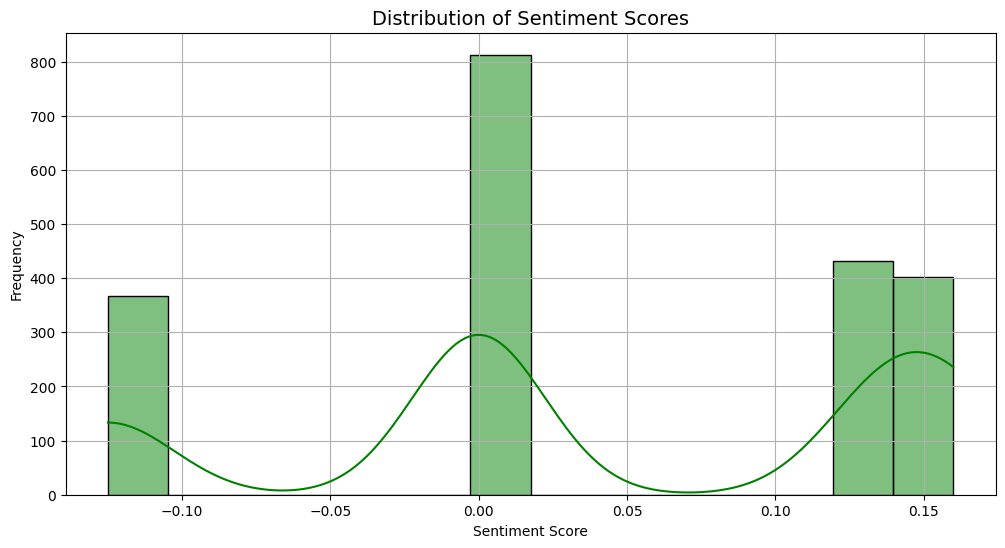

In [14]:
# Plotting the distribution of sentiment scores
plt.figure(figsize=(12, 6))
sns.histplot(stock_data['Sentiment'], kde=True, color='green')

# Title and labels
plt.title('Distribution of Sentiment Scores', fontsize=14)
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [15]:
# Measure the time taken for each epoch
import time

start_time = time.time()

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

end_time = time.time()

print(f"Total training time: {end_time - start_time:.2f} seconds")


Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 9.6923e-04 - val_loss: 0.0021
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 8.9207e-04 - val_loss: 0.0019
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 7.8987e-04 - val_loss: 0.0014
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 8.1132e-04 - val_loss: 0.0019
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 7.8437e-04 - val_loss: 0.0019
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 7.4191e-04 - val_loss: 0.0052
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 8.4860e-04 - val_loss: 0.0013
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 6.3883e-04 - val_loss: 0.0019
Epoch 9/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 6.7701e-04 - val_loss: 0.0030
Epoch 10/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 7.2217e-04 - val_loss: 0.0015
Total training time: 22.63 seconds
